# Pandas ( http://pandas.pydata.org/ ):  Python資料分析函式庫



# 資料結構: Series

Series is a one-dimensional labeled array capable of holding any data type

In [1]:
import numpy as np
import pandas as pd

# pd.Series(data)：data可以是 python的字典物件、numpy的n維陣列(ndarray)、純量值(a scalar value)

# From ndarray

In [2]:
pd.Series(np.random.randn(5)) #從平均數是0和變異數是1的常態分配中，產生一個指定shape的n維陣列

0   -1.848164
1   -1.448913
2    1.121065
3   -0.008671
4    0.973541
dtype: float64

In [3]:
pd.Series(np.random.randn(5), name='something') # Series的名字

0    2.048157
1   -2.799772
2   -0.310417
3   -0.308842
4   -2.120758
Name: something, dtype: float64

In [4]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'], name="somthing")
s

a   -1.229591
b   -0.884413
c    1.238892
d    0.494245
e    0.281612
Name: somthing, dtype: float64

In [5]:
s2 = s.rename("different")
s2.name

'different'

In [6]:
s2.index # index(索引)

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

# From Dictionary

In [7]:
d = {'a' : 0., 'b' : 1., 'c' : 2.}
pd.Series(d)

a    0.0
b    1.0
c    2.0
dtype: float64

In [8]:
d = {'a' : 0., 'b' : 1., 'c' : 2.}
pd.Series(d, index=['b', 'c', 'd', 'a']) 
# NaN (not a number) is the standard missing data marker used in pandas

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

From scalar value

In [9]:
pd.Series(5., index=['a', 'b', 'c', 'd', 'e'])
#如果資料是純量值，就必須提供索引

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

# Series is ndarray-like

In [10]:
s

a   -1.229591
b   -0.884413
c    1.238892
d    0.494245
e    0.281612
Name: somthing, dtype: float64

In [11]:
s[0]

-1.2295907040816034

In [12]:
s[:3]

a   -1.229591
b   -0.884413
c    1.238892
Name: somthing, dtype: float64

In [13]:
s[s > s.median()] # 中位數是1

c    1.238892
d    0.494245
Name: somthing, dtype: float64

In [14]:
s[[4, 3, 1]]

e    0.281612
d    0.494245
b   -0.884413
Name: somthing, dtype: float64

In [15]:
np.exp(s) # exponential 自然指數e

a    0.292412
b    0.412957
c    3.451788
d    1.639260
e    1.325264
Name: somthing, dtype: float64

In [16]:
s + s

a   -2.459181
b   -1.768826
c    2.477785
d    0.988490
e    0.563224
Name: somthing, dtype: float64

In [17]:
s * 3

a   -3.688772
b   -2.653239
c    3.716677
d    1.482735
e    0.844836
Name: somthing, dtype: float64

In [18]:
s[1:] + s[:-1] # key相同的做運算，不同的是 not a number

a         NaN
b   -1.768826
c    2.477785
d    0.988490
e         NaN
Name: somthing, dtype: float64

# Series is dict-like

In [19]:
s

a   -1.229591
b   -0.884413
c    1.238892
d    0.494245
e    0.281612
Name: somthing, dtype: float64

In [20]:
s["a"]

-1.2295907040816034

In [21]:
s["e"] = 12.0 # 重新給值
s

a    -1.229591
b    -0.884413
c     1.238892
d     0.494245
e    12.000000
Name: somthing, dtype: float64

In [22]:
"e" in s

True

In [23]:
"f" in s

False

In [24]:
s["f"] # 索引不存在會有例外

KeyError: 'f'

In [25]:
print(s.get('f')) # 用get函式遺失值會回傳None

None


In [26]:
s.get('f', np.nan) #或是給特定的回傳值。 np.nan (not a number)

nan

# 資料結構：DataFrame

DataFrame is a 2-dimensional labeled data structure with columns of potentially different types

# pd.DataFrame(data)：data可以是字典(Dict of 1D ndarrays, lists, dicts, or Series)、NumPy 2維陣列(2-D numpy.ndarray)、結構化陣列(Structured or record ndarray)、序列(A Series)、另一個DataFrame

# From dict of Series or dicts

In [27]:
d = {"one" : pd.Series([1., 2., 3.], index=["a", "b", "c"]),
     "two" : pd.Series([1., 2., 3., 4.], index=["a", "b", "c", "d"])}
df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [28]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [29]:
df.columns

Index(['one', 'two'], dtype='object')

In [30]:
pd.DataFrame(d, index=["d", "b", "a"]) # 用 index屬性 存取特定的列 

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [31]:
pd.DataFrame(d, index=["d", "b", "a"], columns=["two", "three"]) # 用 columns屬性 存取特定的欄

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


From dict of ndarrays / lists

In [32]:
d = {"one" : [1., 2., 3., 4.],
     "two" : [4., 3., 2., 1.]}
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [33]:
pd.DataFrame(d, index=['a', 'b', 'c', 'd'])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


# From structured or record array

In [34]:
# Data type objects: https://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html
data = np.zeros((2,), dtype=[('A', 'i4'),('B', 'f4'),('C', 'a10')])
# i4: 32-bit signed integer ; f8: 64-bit floating-point number ; a10: 10-character string
data

array([(0, 0.0, b''), (0, 0.0, b'')], 
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [35]:
data[:] = [(1,2.,'Hello'), (2,3.,"World")]
data

array([(1, 2.0, b'Hello'), (2, 3.0, b'World')], 
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [36]:
pd.DataFrame(data)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


In [37]:
pd.DataFrame(data, index=['first', 'second'])

,A,B,C
first,1,2.0,b'Hello'
second,2,3.0,b'World'


In [38]:
pd.DataFrame(data, columns=['C', 'A', 'B'])

,C,A,B
0,b'Hello',1,2.0
1,b'World',2,3.0


# From a list of dicts

In [39]:
data2 = [{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]
data2

[{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]

In [40]:
pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [41]:
pd.DataFrame(data2, index=['first', 'second'])

,a,b,c
first,1,2,NaN
second,5,10,20.0


In [42]:
pd.DataFrame(data2, columns=['a', 'b'])

,a,b
0,1,2
1,5,10


# From a dict of tuples

In [43]:
pd.DataFrame({('a', 'b'): {('A', 'B'): 1, ('A', 'C'): 2},
              ('a', 'a'): {('A', 'C'): 3, ('A', 'B'): 4},
              ('a', 'c'): {('A', 'B'): 5, ('A', 'C'): 6},
              ('b', 'a'): {('A', 'C'): 7, ('A', 'B'): 8},
              ('b', 'b'): {('A', 'D'): 9, ('A', 'B'): 10}})

a              b      
       a    b    c    a     b
A B  4.0  1.0  5.0  8.0  10.0
  C  3.0  2.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

# 10 Minutes to Pandas
http://pandas.pydata.org/pandas-docs/stable/10min.html

# 建立 Series / DataFrame

In [44]:
import pandas as pd
import numpy as np

In [45]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [46]:
dates = pd.date_range("20130101", periods=6) 
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [47]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-1.570817,0.766323,-1.686560,0.152984
2013-01-02,-0.139249,0.441331,0.256933,-0.013567
2013-01-03,-1.689962,0.497315,0.739239,-0.160719
2013-01-04,0.455824,0.035708,0.462143,-0.402865
2013-01-05,-0.728037,-0.017208,-1.665536,0.653623
2013-01-06,-0.441118,0.780608,-0.018062,-0.106139


In [48]:
df2 = pd.DataFrame({ "A" : 1.,
                     "B" : pd.Timestamp("20130102"),
                     "C" : pd.Series(1, index=list(range(4)), dtype="float32"),
                     "D" : np.array([3] * 4, dtype="int32"),
                     "E" : pd.Categorical(["test","train","test","train"]),
                     "F" : "foo" })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [49]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

# 檢視資料 (Viewing Data)

In [50]:
df

,A,B,C,D
2013-01-01,-1.570817,0.766323,-1.686560,0.152984
2013-01-02,-0.139249,0.441331,0.256933,-0.013567
2013-01-03,-1.689962,0.497315,0.739239,-0.160719
2013-01-04,0.455824,0.035708,0.462143,-0.402865
2013-01-05,-0.728037,-0.017208,-1.665536,0.653623
2013-01-06,-0.441118,0.780608,-0.018062,-0.106139


In [51]:
df.head(2) # 前面n列。預設n=5 

,A,B,C,D
2013-01-01,-1.570817,0.766323,-1.686560,0.152984
2013-01-02,-0.139249,0.441331,0.256933,-0.013567


In [52]:
df.tail(3) # 最後n列。預設n=5 

,A,B,C,D
2013-01-04,0.455824,0.035708,0.462143,-0.402865
2013-01-05,-0.728037,-0.017208,-1.665536,0.653623
2013-01-06,-0.441118,0.780608,-0.018062,-0.106139


In [53]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [54]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [55]:
df.values

array([[-1.57081739,  0.76632253, -1.68656029,  0.15298429],
       [-0.13924928,  0.44133142,  0.25693307, -0.01356743],
       [-1.68996227,  0.49731492,  0.73923907, -0.16071939],
       [ 0.455824  ,  0.03570811,  0.46214313, -0.40286547],
       [-0.72803708, -0.01720827, -1.66553625,  0.65362338],
       [-0.44111778,  0.78060787, -0.01806168, -0.10613916]])

In [56]:
df.describe() # 資料的統計摘要

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.685560,0.417346,-0.318640,0.020553
std,0.831297,0.345021,1.080342,0.359909
min,-1.689962,-0.017208,-1.686560,-0.402865
25%,-1.360122,0.137114,-1.253668,-0.147074
50%,-0.584577,0.469323,0.119436,-0.059853
75%,-0.214716,0.699071,0.410841,0.111346
max,0.455824,0.780608,0.739239,0.653623


In [57]:
df.T # 矩陣的轉置(transpose)

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-1.570817,-0.139249,-1.689962,0.455824,-0.728037,-0.441118
B,0.766323,0.441331,0.497315,0.035708,-0.017208,0.780608
C,-1.686560,0.256933,0.739239,0.462143,-1.665536,-0.018062
D,0.152984,-0.013567,-0.160719,-0.402865,0.653623,-0.106139


In [58]:
df

,A,B,C,D
2013-01-01,-1.570817,0.766323,-1.686560,0.152984
2013-01-02,-0.139249,0.441331,0.256933,-0.013567
2013-01-03,-1.689962,0.497315,0.739239,-0.160719
2013-01-04,0.455824,0.035708,0.462143,-0.402865
2013-01-05,-0.728037,-0.017208,-1.665536,0.653623
2013-01-06,-0.441118,0.780608,-0.018062,-0.106139


In [59]:
df.sort_index(axis=1, ascending=False) # 依照條件排序，axis軸：0代表列，1代表欄。 ascending 遞增。

,D,C,B,A
2013-01-01,0.152984,-1.686560,0.766323,-1.570817
2013-01-02,-0.013567,0.256933,0.441331,-0.139249
2013-01-03,-0.160719,0.739239,0.497315,-1.689962
2013-01-04,-0.402865,0.462143,0.035708,0.455824
2013-01-05,0.653623,-1.665536,-0.017208,-0.728037
2013-01-06,-0.106139,-0.018062,0.780608,-0.441118


In [60]:
df.sort_values(by='B') # 根據B的值遞增排序

,A,B,C,D
2013-01-05,-0.728037,-0.017208,-1.665536,0.653623
2013-01-04,0.455824,0.035708,0.462143,-0.402865
2013-01-02,-0.139249,0.441331,0.256933,-0.013567
2013-01-03,-1.689962,0.497315,0.739239,-0.160719
2013-01-01,-1.570817,0.766323,-1.686560,0.152984
2013-01-06,-0.441118,0.780608,-0.018062,-0.106139


# 選擇資料 (Selecting Data)

In [61]:
df["A"] # 選擇A欄位的序列，等同 df.A

2013-01-01   -1.570817
2013-01-02   -0.139249
2013-01-03   -1.689962
2013-01-04    0.455824
2013-01-05   -0.728037
2013-01-06   -0.441118
Freq: D, Name: A, dtype: float64

In [62]:
df.A

2013-01-01   -1.570817
2013-01-02   -0.139249
2013-01-03   -1.689962
2013-01-04    0.455824
2013-01-05   -0.728037
2013-01-06   -0.441118
Freq: D, Name: A, dtype: float64

In [63]:
df[0:3] #用slice選擇列

,A,B,C,D
2013-01-01,-1.570817,0.766323,-1.686560,0.152984
2013-01-02,-0.139249,0.441331,0.256933,-0.013567
2013-01-03,-1.689962,0.497315,0.739239,-0.160719


In [64]:
print(dates)
df.loc[dates[0]] #用label選擇資料。dates[0]是"2013-01-01"那一列

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


A   -1.570817
B    0.766323
C   -1.686560
D    0.152984
Name: 2013-01-01 00:00:00, dtype: float64

In [65]:
df.loc[:,['A','B']] #df.loc[rows, columns]：用多軸(multi-axis)label選擇資料。

,A,B
2013-01-01,-1.570817,0.766323
2013-01-02,-0.139249,0.441331
2013-01-03,-1.689962,0.497315
2013-01-04,0.455824,0.035708
2013-01-05,-0.728037,-0.017208
2013-01-06,-0.441118,0.780608


In [66]:
df.loc['20130102':'20130104',['A','B']] #用slice選擇，包含endpoint 

,A,B
2013-01-02,-0.139249,0.441331
2013-01-03,-1.689962,0.497315
2013-01-04,0.455824,0.035708


In [67]:
df.loc["20130102",["A","B"]] # 降成一維 Reduction in the dimensions of the returned object

A   -0.139249
B    0.441331
Name: 2013-01-02 00:00:00, dtype: float64

In [68]:
df.loc[dates[0],"A"] # 選擇特定位置的值

-1.5708173942649528

In [69]:
df.at[dates[0],"A"] # 等同 df.loc[dates[0],"A"]

-1.5708173942649528

# 根據位置選擇 (Selection by Position) 

In [70]:
df

,A,B,C,D
2013-01-01,-1.570817,0.766323,-1.686560,0.152984
2013-01-02,-0.139249,0.441331,0.256933,-0.013567
2013-01-03,-1.689962,0.497315,0.739239,-0.160719
2013-01-04,0.455824,0.035708,0.462143,-0.402865
2013-01-05,-0.728037,-0.017208,-1.665536,0.653623
2013-01-06,-0.441118,0.780608,-0.018062,-0.106139


In [71]:
df.iloc[3] # 用位置(position)選擇資料。3是第四列。

A    0.455824
B    0.035708
C    0.462143
D   -0.402865
Name: 2013-01-04 00:00:00, dtype: float64

In [72]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,0.455824,0.035708
2013-01-05,-0.728037,-0.017208


In [73]:
df.iloc[[1,2,4],[0,2]] # 第2列、第3列、第5列。第1欄到第2欄。

,A,C
2013-01-02,-0.139249,0.256933
2013-01-03,-1.689962,0.739239
2013-01-05,-0.728037,-1.665536


In [74]:
df.iloc[1:3,:] # 第2列到第3列，:指的是所有欄位 

,A,B,C,D
2013-01-02,-0.139249,0.441331,0.256933,-0.013567
2013-01-03,-1.689962,0.497315,0.739239,-0.160719


In [75]:
df.iloc[:,1:3] # :指的是所有列，第2欄到第3欄

,B,C
2013-01-01,0.766323,-1.686560
2013-01-02,0.441331,0.256933
2013-01-03,0.497315,0.739239
2013-01-04,0.035708,0.462143
2013-01-05,-0.017208,-1.665536
2013-01-06,0.780608,-0.018062


In [76]:
df.iloc[1,1] # 第2列第2欄的值

0.44133141962615302

In [77]:
df.iat[1,1] # 等同 df.iloc[1,1]

0.44133141962615302

# 布林索引(Boolean Indexing)

In [78]:
df

,A,B,C,D
2013-01-01,-1.570817,0.766323,-1.686560,0.152984
2013-01-02,-0.139249,0.441331,0.256933,-0.013567
2013-01-03,-1.689962,0.497315,0.739239,-0.160719
2013-01-04,0.455824,0.035708,0.462143,-0.402865
2013-01-05,-0.728037,-0.017208,-1.665536,0.653623
2013-01-06,-0.441118,0.780608,-0.018062,-0.106139


In [79]:
df[df.A > 0] # 用單一欄位的值選擇資料

,A,B,C,D
2013-01-04,0.455824,0.035708,0.462143,-0.402865


In [80]:
df[df > 0] # 用where選擇值，不滿足條件的是NaN

,A,B,C,D
2013-01-01,NaN,0.766323,NaN,0.152984
2013-01-02,NaN,0.441331,0.256933,NaN
2013-01-03,NaN,0.497315,0.739239,NaN
2013-01-04,0.455824,0.035708,0.462143,NaN
2013-01-05,NaN,NaN,NaN,0.653623
2013-01-06,NaN,0.780608,NaN,NaN


In [81]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,-1.570817,0.766323,-1.686560,0.152984,one
2013-01-02,-0.139249,0.441331,0.256933,-0.013567,one
2013-01-03,-1.689962,0.497315,0.739239,-0.160719,two
2013-01-04,0.455824,0.035708,0.462143,-0.402865,three
2013-01-05,-0.728037,-0.017208,-1.665536,0.653623,four
2013-01-06,-0.441118,0.780608,-0.018062,-0.106139,three


In [82]:
df2[df2['E'].isin(['two','four'])] # 用isin()過濾資料

,A,B,C,D,E
2013-01-03,-1.689962,0.497315,0.739239,-0.160719,two
2013-01-05,-0.728037,-0.017208,-1.665536,0.653623,four


# 設定 (Setting)

In [83]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range("20130102", periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [84]:
df['F'] = s1 # 新增一欄。自動對齊列索引。
df

,A,B,C,D,F
2013-01-01,-1.570817,0.766323,-1.686560,0.152984,NaN
2013-01-02,-0.139249,0.441331,0.256933,-0.013567,1.0
2013-01-03,-1.689962,0.497315,0.739239,-0.160719,2.0
2013-01-04,0.455824,0.035708,0.462143,-0.402865,3.0
2013-01-05,-0.728037,-0.017208,-1.665536,0.653623,4.0
2013-01-06,-0.441118,0.780608,-0.018062,-0.106139,5.0


In [85]:
df.at[dates[0],"A"] = 0 # 改變某個位置的值
df

,A,B,C,D,F
2013-01-01,0.000000,0.766323,-1.686560,0.152984,NaN
2013-01-02,-0.139249,0.441331,0.256933,-0.013567,1.0
2013-01-03,-1.689962,0.497315,0.739239,-0.160719,2.0
2013-01-04,0.455824,0.035708,0.462143,-0.402865,3.0
2013-01-05,-0.728037,-0.017208,-1.665536,0.653623,4.0
2013-01-06,-0.441118,0.780608,-0.018062,-0.106139,5.0


In [86]:
df.iat[0,1] = 0 # 用位置改變值
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.686560,0.152984,NaN
2013-01-02,-0.139249,0.441331,0.256933,-0.013567,1.0
2013-01-03,-1.689962,0.497315,0.739239,-0.160719,2.0
2013-01-04,0.455824,0.035708,0.462143,-0.402865,3.0
2013-01-05,-0.728037,-0.017208,-1.665536,0.653623,4.0
2013-01-06,-0.441118,0.780608,-0.018062,-0.106139,5.0


In [87]:
df.loc[:,'D'] = np.array([5] * len(df)) # 用 numpy陣列給值 
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.686560,5,NaN
2013-01-02,-0.139249,0.441331,0.256933,5,1.0
2013-01-03,-1.689962,0.497315,0.739239,5,2.0
2013-01-04,0.455824,0.035708,0.462143,5,3.0
2013-01-05,-0.728037,-0.017208,-1.665536,5,4.0
2013-01-06,-0.441118,0.780608,-0.018062,5,5.0


In [88]:
df2 = df.copy()
df2[df2 > 1] = -df2 # 值大於1變成負號
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.686560,-5,NaN
2013-01-02,-0.139249,0.441331,0.256933,-5,1.0
2013-01-03,-1.689962,0.497315,0.739239,-5,-2.0
2013-01-04,0.455824,0.035708,0.462143,-5,-3.0
2013-01-05,-0.728037,-0.017208,-1.665536,-5,-4.0
2013-01-06,-0.441118,0.780608,-0.018062,-5,-5.0


# 遺失值 (Missing data): 用numpy的NaN表示

In [89]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E']) # reindex()改變索引
# missing values 用 NaN 表示
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.686560,5,NaN,NaN
2013-01-02,-0.139249,0.441331,0.256933,5,1.0,NaN
2013-01-03,-1.689962,0.497315,0.739239,5,2.0,NaN
2013-01-04,0.455824,0.035708,0.462143,5,3.0,NaN


In [90]:
df1.loc[dates[0]:dates[1],'E'] = 1 # 第1列和第2列 的 第E欄 的值改為1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.686560,5,NaN,1.0
2013-01-02,-0.139249,0.441331,0.256933,5,1.0,1.0
2013-01-03,-1.689962,0.497315,0.739239,5,2.0,NaN
2013-01-04,0.455824,0.035708,0.462143,5,3.0,NaN


In [91]:
df1.dropna(how="any") # 在copy上操作，丟掉任何(any)有NaN的列

,A,B,C,D,F,E
2013-01-02,-0.139249,0.441331,0.256933,5,1.0,1.0


In [92]:
df1.fillna(value=5) # 在copy上操作，填入遺失值

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.686560,5,5.0,1.0
2013-01-02,-0.139249,0.441331,0.256933,5,1.0,1.0
2013-01-03,-1.689962,0.497315,0.739239,5,2.0,5.0
2013-01-04,0.455824,0.035708,0.462143,5,3.0,5.0


In [93]:
pd.isnull(df1) # 是否是遺失值 

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


# 運算(Operations)：一般情況下，排除遺失值

In [94]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.686560,5,NaN
2013-01-02,-0.139249,0.441331,0.256933,5,1.0
2013-01-03,-1.689962,0.497315,0.739239,5,2.0
2013-01-04,0.455824,0.035708,0.462143,5,3.0
2013-01-05,-0.728037,-0.017208,-1.665536,5,4.0
2013-01-06,-0.441118,0.780608,-0.018062,5,5.0


# Stat

In [95]:
df.mean() # 預設值是0，列平均

A   -0.423757
B    0.289626
C   -0.318640
D    5.000000
F    3.000000
dtype: float64

In [96]:
df.mean(1) # 1是欄平均

2013-01-01    0.828360
2013-01-02    1.311803
2013-01-03    1.309318
2013-01-04    1.790735
2013-01-05    1.317844
2013-01-06    2.064286
Freq: D, dtype: float64

In [97]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates)
s

2013-01-01    1.0
2013-01-02    3.0
2013-01-03    5.0
2013-01-04    NaN
2013-01-05    6.0
2013-01-06    8.0
Freq: D, dtype: float64

In [98]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2) # shift()移動列數n
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [99]:
df.sub(s, axis='index') # sub()減去Series s，NaN運算即是NaN

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-2.689962,-0.502685,-0.260761,4.0,1.0
2013-01-04,-2.544176,-2.964292,-2.537857,2.0,0.0
2013-01-05,-5.728037,-5.017208,-6.665536,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


# Apply

In [100]:
df.apply(np.cumsum) # np.cumsum()：元素的累加（cumulative sum）

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.686560,5,NaN
2013-01-02,-0.139249,0.441331,-1.429627,10,1.0
2013-01-03,-1.829212,0.938646,-0.690388,15,3.0
2013-01-04,-1.373388,0.974354,-0.228245,20,6.0
2013-01-05,-2.101425,0.957146,-1.893781,25,10.0
2013-01-06,-2.542542,1.737754,-1.911843,30,15.0


In [101]:
df.apply(lambda x: x.max() - x.min()) # lambda函式：最大值 減去 最小值

A    2.145786
B    0.797816
C    2.425799
D    0.000000
F    4.000000
dtype: float64

# Histogramming

In [102]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    2
1    0
2    0
3    0
4    3
5    4
6    3
7    1
8    5
9    2
dtype: int64

In [103]:
s.value_counts() # 每個值有幾個

0    3
3    2
2    2
5    1
4    1
1    1
dtype: int64

# String Methods

In [104]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [105]:
s.str.lower() # 字串元素變成小寫

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# Merge

In [106]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,1.607434,-1.145279,-0.588065,1.770503
1,-0.696865,-0.869171,0.093260,1.131968
2,2.072981,-0.823466,0.973394,1.587377
3,-1.451110,-3.383653,2.242102,-1.691517
4,0.959348,1.021958,0.883190,0.820480
5,0.422664,1.569827,-0.334185,-0.299864
6,-1.609253,0.889890,0.210477,-0.537707
7,0.721948,-1.542320,0.101756,-0.275882
8,1.791777,-0.395857,-1.165244,-0.603247
9,-0.160325,0.012160,0.817732,0.669627


In [107]:
pieces = [df[:3], df[3:7], df[7:]] # 切成幾塊 break it into pieces
pieces

[          0         1         2         3
 0  1.607434 -1.145279 -0.588065  1.770503
 1 -0.696865 -0.869171  0.093260  1.131968
 2  2.072981 -0.823466  0.973394  1.587377,
           0         1         2         3
 3 -1.451110 -3.383653  2.242102 -1.691517
 4  0.959348  1.021958  0.883190  0.820480
 5  0.422664  1.569827 -0.334185 -0.299864
 6 -1.609253  0.889890  0.210477 -0.537707,
           0         1         2         3
 7  0.721948 -1.542320  0.101756 -0.275882
 8  1.791777 -0.395857 -1.165244 -0.603247
 9 -0.160325  0.012160  0.817732  0.669627]

In [108]:
pd.concat(pieces) # concat()把..連成一串

,0,1,2,3
0,1.607434,-1.145279,-0.588065,1.770503
1,-0.696865,-0.869171,0.093260,1.131968
2,2.072981,-0.823466,0.973394,1.587377
3,-1.451110,-3.383653,2.242102,-1.691517
4,0.959348,1.021958,0.883190,0.820480
5,0.422664,1.569827,-0.334185,-0.299864
6,-1.609253,0.889890,0.210477,-0.537707
7,0.721948,-1.542320,0.101756,-0.275882
8,1.791777,-0.395857,-1.165244,-0.603247
9,-0.160325,0.012160,0.817732,0.669627


In [109]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,foo,2


In [110]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,foo,5


In [111]:
 pd.merge(left, right, on='key') #用key做SQL style merges

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [112]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


# Append

In [113]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,-1.085778,0.751524,1.292739,0.609600
1,0.363959,-0.199517,0.849151,1.792028
2,-1.558930,2.667202,0.800784,-0.322479
3,-0.174854,0.367012,-0.630619,-1.659918
4,-2.104709,0.657272,1.872628,0.893829
5,-0.338985,0.310903,-1.187932,-0.715906
6,-1.173093,-0.765566,0.735563,0.419660
7,1.373227,0.121600,0.025205,-0.386031


In [114]:
s = df.iloc[3] #取出index為3的那一列
df.append(s, ignore_index=True) # 忽略index，將s列附加到最後成為新的一列 index 8

,A,B,C,D
0,-1.085778,0.751524,1.292739,0.609600
1,0.363959,-0.199517,0.849151,1.792028
2,-1.558930,2.667202,0.800784,-0.322479
3,-0.174854,0.367012,-0.630619,-1.659918
4,-2.104709,0.657272,1.872628,0.893829
5,-0.338985,0.310903,-1.187932,-0.715906
6,-1.173093,-0.765566,0.735563,0.419660
7,1.373227,0.121600,0.025205,-0.386031
8,-0.174854,0.367012,-0.630619,-1.659918


# Grouping

In [115]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-1.937181,0.230907
1,bar,one,-1.253989,-0.940960
2,foo,two,1.131869,-1.173429
3,bar,three,-0.003938,1.985680
4,foo,two,-1.102525,-0.475358
5,bar,two,-0.066892,1.550211
6,foo,one,-0.457131,0.113840
7,foo,three,-0.055425,-0.039308


In [116]:
df.groupby('A').sum() # 根據 A欄位的值 分組，然後用其他欄位加總。

,C,D
A,,
bar,-1.324819,2.594931
foo,-2.420393,-1.343347


In [117]:
df.groupby(['A','B']).sum() # 根據 A和B欄位的值 分組，然後用其他欄位加總。

C         D
A   B                        
bar one   -1.253989 -0.940960
    three -0.003938  1.985680
    two   -0.066892  1.550211
foo one   -2.394312  0.344747
    three -0.055425 -0.039308
    two    0.029344 -1.648786

# Reshaping

In [118]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                    'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [119]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

In [120]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one    -0.333980 -0.746477
      two    -0.099103 -0.372338
baz   one     1.400462 -0.750429
      two     0.316899  1.358686
foo   one     1.322770  1.859836
      two    -0.176498  1.652288
qux   one    -1.714053 -0.736895
      two     0.580569  0.344920

In [121]:
df2 = df[:4]
stacked = df2.stack() # The stack() method “compresses” a level in the DataFrame’s columns
stacked
#print(type(stacked))

first  second   
bar    one     A   -0.333980
               B   -0.746477
       two     A   -0.099103
               B   -0.372338
baz    one     A    1.400462
               B   -0.750429
       two     A    0.316899
               B    1.358686
dtype: float64

In [122]:
stacked.unstack() # default unstacks the last level

A         B
first second                    
bar   one    -0.333980 -0.746477
      two    -0.099103 -0.372338
baz   one     1.400462 -0.750429
      two     0.316899  1.358686

In [123]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.333980 -0.099103
      B -0.746477 -0.372338
baz   A  1.400462  0.316899
      B -0.750429  1.358686

In [124]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.333980  1.400462
       B -0.746477 -0.750429
two    A -0.099103  0.316899
       B -0.372338  1.358686

# Pivot Tables (樞紐分析表)

In [125]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,1.848751,1.478609
1,one,B,foo,-1.319690,0.139384
2,two,C,foo,-0.029380,0.656803
3,three,A,bar,-0.269428,-0.600648
4,one,B,bar,2.021166,-0.808202
5,one,C,bar,-0.528132,-0.750352
6,two,A,foo,0.130072,0.871561
7,three,B,foo,-1.019374,0.567927
8,one,C,foo,1.054638,0.885425
9,one,A,bar,0.232090,-0.741329


In [126]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.232090  1.848751
      B  2.021166 -1.319690
      C -0.528132  1.054638
three A -0.269428       NaN
      B       NaN -1.019374
      C  1.044155       NaN
two   A       NaN  0.130072
      B -0.081970       NaN
      C       NaN -0.029380

# Time Series (時間序列)

In [127]:
rng = pd.date_range('1/1/2012', periods=100, freq='S') # S:秒
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [128]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2012-01-01 00:00:00    265
2012-01-01 00:00:01    430
2012-01-01 00:00:02     28
2012-01-01 00:00:03    457
2012-01-01 00:00:04    389
2012-01-01 00:00:05    374
2012-01-01 00:00:06     77
2012-01-01 00:00:07    455
2012-01-01 00:00:08    447
2012-01-01 00:00:09      0
2012-01-01 00:00:10    363
2012-01-01 00:00:11    271
2012-01-01 00:00:12    175
2012-01-01 00:00:13    420
2012-01-01 00:00:14    275
2012-01-01 00:00:15    409
2012-01-01 00:00:16    158
2012-01-01 00:00:17    368
2012-01-01 00:00:18    132
2012-01-01 00:00:19    354
2012-01-01 00:00:20    480
2012-01-01 00:00:21     19
2012-01-01 00:00:22    221
2012-01-01 00:00:23    336
2012-01-01 00:00:24    180
2012-01-01 00:00:25    166
2012-01-01 00:00:26    225
2012-01-01 00:00:27    180
2012-01-01 00:00:28    302
2012-01-01 00:00:29    302
                      ... 
2012-01-01 00:01:10    154
2012-01-01 00:01:11     52
2012-01-01 00:01:12     97
2012-01-01 00:01:13    228
2012-01-01 00:01:14    195
2012-01-01 00:01:15    130
2

In [129]:
ts.resample('1Min').sum() # 每1分鐘抽樣，並且加總值


2012-01-01 00:00:00    16567
2012-01-01 00:01:00     9008
Freq: T, dtype: int64

In [130]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -1.673828
2012-03-07    1.824273
2012-03-08    0.138911
2012-03-09   -0.317910
2012-03-10   -0.475561
Freq: D, dtype: float64

In [131]:
ts_utc = ts.tz_localize('UTC') # 時區定位
ts_utc

2012-03-06 00:00:00+00:00   -1.673828
2012-03-07 00:00:00+00:00    1.824273
2012-03-08 00:00:00+00:00    0.138911
2012-03-09 00:00:00+00:00   -0.317910
2012-03-10 00:00:00+00:00   -0.475561
Freq: D, dtype: float64

In [132]:
ts_utc.tz_convert('US/Eastern') # 時區轉換

2012-03-05 19:00:00-05:00   -1.673828
2012-03-06 19:00:00-05:00    1.824273
2012-03-07 19:00:00-05:00    0.138911
2012-03-08 19:00:00-05:00   -0.317910
2012-03-09 19:00:00-05:00   -0.475561
Freq: D, dtype: float64

In [133]:
rng = pd.date_range('1/1/2012', periods=5, freq='M') # M：每個月30天
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    0.889152
2012-02-29   -0.203831
2012-03-31    1.768491
2012-04-30    0.770631
2012-05-31    0.237328
Freq: M, dtype: float64

In [134]:
ps = ts.to_period()
ps

2012-01    0.889152
2012-02   -0.203831
2012-03    1.768491
2012-04    0.770631
2012-05    0.237328
Freq: M, dtype: float64

In [135]:
ps.to_timestamp()

2012-01-01    0.889152
2012-02-01   -0.203831
2012-03-01    1.768491
2012-04-01    0.770631
2012-05-01    0.237328
Freq: MS, dtype: float64

# Categoricals

In [136]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [137]:
df["grade"] = df["raw_grade"].astype("category") # 轉換成類別型態
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [138]:
df["grade"].cat.categories = ["very good", "good", "very bad"] # 重新命名類別
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): [very good, good, very bad]

In [139]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
# 重新排序類別，並新增missing value類別
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [140]:
df.sort_values(by="grade") # 根據類別排序

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [141]:
df.groupby("grade").size() # 根據欄位值分組

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# Plotting

<class 'pandas.core.series.Series'>


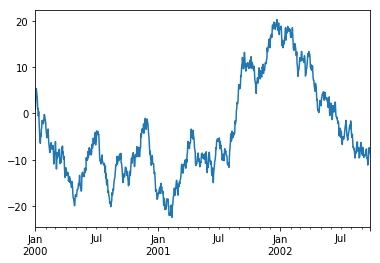

In [142]:
%matplotlib inline

ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
print(type(ts))
ts.plot()

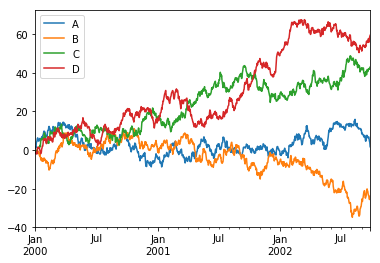

In [143]:
%matplotlib inline
import matplotlib.pyplot as plt

df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc='best') # 圖例說明放在最佳位置 
plt.show()

# Getting Data In/Out

In [144]:
df = pd.DataFrame(np.random.randn(1000, 4), 
                  index=pd.date_range('1/1/2000', periods=1000),
                  columns=['A', 'B', 'C', 'D'])
df.to_csv("foo.csv") # 寫入CSV檔
df

,A,B,C,D
2000-01-01,-0.192669,1.294620,1.371385,-1.214464
2000-01-02,1.255042,-1.653159,-1.393339,2.252238
2000-01-03,-0.771388,0.618751,1.280146,0.542938
2000-01-04,-0.720938,-0.146734,0.066869,-0.090847
2000-01-05,-0.686369,-1.518519,-1.615227,0.293839
2000-01-06,-1.058750,0.465995,1.144437,-1.423197
2000-01-07,-0.102466,-0.055810,0.145463,-0.211206
2000-01-08,0.114977,0.010801,1.213729,-1.337357
2000-01-09,-1.228928,-0.121913,0.582834,-0.224022
2000-01-10,-1.165866,1.059799,-0.771043,-0.259865


In [145]:
pd.read_csv('foo.csv') # 讀取csv檔

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.192669,1.294620,1.371385,-1.214464
1,2000-01-02,1.255042,-1.653159,-1.393339,2.252238
2,2000-01-03,-0.771388,0.618751,1.280146,0.542938
3,2000-01-04,-0.720938,-0.146734,0.066869,-0.090847
4,2000-01-05,-0.686369,-1.518519,-1.615227,0.293839
5,2000-01-06,-1.058750,0.465995,1.144437,-1.423197
6,2000-01-07,-0.102466,-0.055810,0.145463,-0.211206
7,2000-01-08,0.114977,0.010801,1.213729,-1.337357
8,2000-01-09,-1.228928,-0.121913,0.582834,-0.224022
9,2000-01-10,-1.165866,1.059799,-0.771043,-0.259865


In [146]:
csv = pd.read_csv('foo.csv')
csv.loc[:10,["A"]] 

,A
0,-0.192669
1,1.255042
2,-0.771388
3,-0.720938
4,-0.686369
5,-1.058750
6,-0.102466
7,0.114977
8,-1.228928
9,-1.165866
